## Data Used

source: [DIV2K Dataset kaggle](https://www.kaggle.com/datasets/francescopignatelli/div2k-dataset-antialias?resource=download-directory)

Data already split into train validation and test splits, folder structure:
```
Dataset/
    ├── train/
    ├── train_labels/
    ├── validation/
    ├── validation_labels/
    ├── test/
    └── test_labels/
```

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from PIL import Image

### Number of images in DIV2K dataset in each splits:

In [8]:
dataset_root = Path("Dataset")

splits = ["train", "train_labels", "validation", "validation_labels", "test", "test_labels"]

for split in splits:
    d = dataset_root / split
    if not d.exists():
        print(f"{split}: MISSING -> {d}")
        continue
    count = sum(1 for p in d.iterdir() if p.is_file())
    print(f"{split} images: {count}")

train images: 19570
train_labels images: 19570
validation images: 4193
validation_labels images: 4193
test images: 4195
test_labels images: 4195


### Image sizes

In [12]:
for split in splits:
    d = dataset_root / split
    if not d.exists():
        print(f"{split}: MISSING -> {d}")
        continue
    exts = {".png", ".jpg", ".jpeg"}
    unique_sizes = set()
    for i, p in enumerate(sorted(d.iterdir())):
        if p.is_file() and p.suffix.lower() in exts:
            with Image.open(p) as img:
                unique_sizes.add((img.width, img.height))
        if i > 1:
            break # the image size is the same for all, checked before
    print(f"{split} image size: {unique_sizes}")

train image size: {(256, 256)}
train_labels image size: {(256, 256)}
validation image size: {(256, 256)}
validation_labels image size: {(256, 256)}
test image size: {(256, 256)}
test_labels image size: {(256, 256)}


### Example image

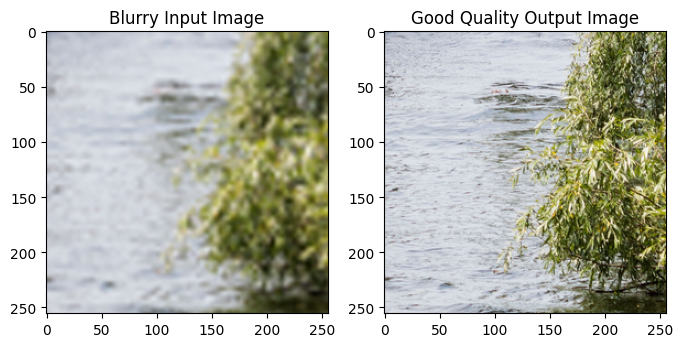

In [16]:
img_in = cv2.imread("Dataset/train/input_10.png")  
img_out = cv2.imread("Dataset/train_labels/output_10.png")

# Convert BGR to RGB
img_in_rgb = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
img_out_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 16))
plt.subplot(1,2,1)
plt.imshow(img_in_rgb)
plt.title('Blurry Input Image')
plt.subplot(1,2,2)
plt.imshow(img_out_rgb)
plt.title('Good Quality Output Image')
plt.show()